In [15]:
import shutil
from collections import namedtuple
import os
import numpy as np
import pandas as pd
import random
import time
import gc

from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

In [16]:
# with open('./file') as f:
import xml.etree.ElementTree as ET
tree = ET.parse('./file')
root = tree.getroot()
for child in root:
    print(child.tag, child.attrib)

    # labels = [line.strip() for line in f.readlines()]

# print(labels)

folder {}
filename {}
source {}
size {}
segment {}
object {}


In [17]:
def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []
    folder = root.find('folder').text
    filename = root.find('filename').text
    if filename == "%s":
        filename = xml_file.split("/")[-1]
    dataset = root.find('source/database').text
    height = int(root.find('size/height').text)
    width = int(root.find('size/width').text)
    ymin = int(root.find("object/bndbox/ymin").text)
    xmin = int(root.find("object/bndbox/xmin").text)
    ymax = int(root.find("object/bndbox/ymax").text)
    xmax = int(root.find("object/bndbox/xmax").text)
    breed = root.find("object/name").text
    for boxes in root.iter('object'):

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)

    # return [breed, folder, filename, dataset, height, width, [xmin, ymin, xmax, ymax]]
    return [filename, dataset, [xmin, ymin, xmax, ymax]]

name = read_content("file")

In [18]:
print(name)

['n02085936_233', 'ImageNet database', [22, 31, 273, 472]]


In [19]:
# df = pd.DataFrame(columns=["breed", "folder", "filename", "dataset", "height", "width", "bbox"])
# for idx, annot in tqdm(enumerate(glob(os.path.abspath("./Annotation/*/*"))), desc="Loading data ... : "):
#     df.loc[idx, ["breed", "folder", "filename", "dataset", "height", "width", "bbox"]] = read_content(annot)


In [20]:
df = pd.DataFrame(columns=["filename", "dataset", "bbox"])
for idx, annot in tqdm(enumerate(glob(os.path.abspath("./Annotation/*/*"))), desc="Loading data ... : "):
    df.loc[idx, ["filename", "dataset", "bbox"]] = read_content(annot)

Loading data ... : : 0it [00:00, ?it/s]

In [21]:
df["dataset"].value_counts()

ImageNet database    19956
ILSVRC_2011            624
Name: dataset, dtype: int64

In [22]:
# df[df["breed"] == "French_bulldog"]

KeyError: 'breed'

In [23]:
# df["breed"].value_counts().shape

In [24]:
import cv2
image = cv2.imread("/home/alex/Bureau/OpenClassroom/projet_6/dataset/Images/n02109525-Saint_Bernard/n02109525_10032.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

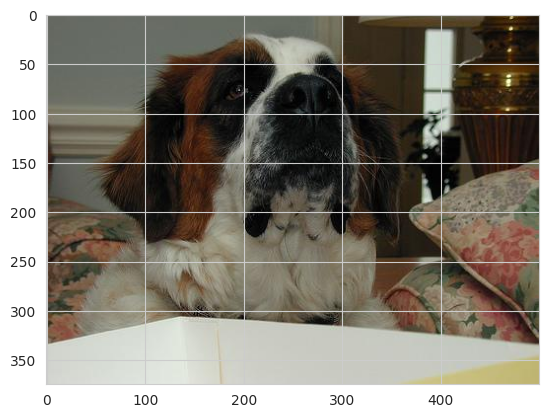

In [25]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [26]:
x1 = df["bbox"][0][0]
y1 = df["bbox"][0][1]
x2 = df["bbox"][0][2]
y2 = df["bbox"][0][3]


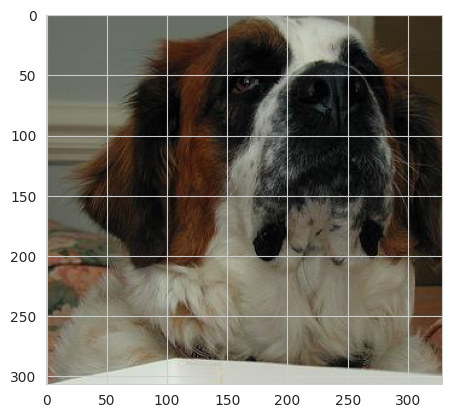

In [27]:
plt.imshow(image[y1:y2, x1:x2])

In [28]:
df.to_csv("annotations.csv", index=False)